# MRI and Alzheimers Prediction

### Importing Libraries

In [46]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist  
import warnings
warnings.simplefilter('ignore')

#### Data Preprocesing

In [3]:
MildDemented = r'D:/Downloads/Science/Alzheimer_s Dataset/train/NonDemented'
ModerateDemented = r'D:/Downloads/Science/Alzheimer_s Dataset/train/ModerateDemented'
NonDemented = r'D:/Downloads/Science/Alzheimer_s Dataset/train/NonDemented'
VeryMildDemented = r'D:/Downloads/Science/Alzheimer_s Dataset/train/VeryMildDemented'

In [47]:
def cargar_datos(ruta, etiqueta, nuevo_ancho, nuevo_alto):
    datos = []
    etiquetas = []
    for archivo in os.listdir(ruta):
        if archivo.endswith(".jpg"):
            imagen = cv2.imread(os.path.join(ruta, archivo))
            imagen = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))
            datos.append(imagen)
            etiquetas.append(etiqueta)
    return datos, etiquetas

nuevo_ancho = 100
nuevo_alto = 100

datos_MildDemented, etiquetas_MildDemented = cargar_datos(MildDemented, etiqueta=3, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
datos_ModerateDemented, etiquetas_ModerateDemented = cargar_datos(ModerateDemented, etiqueta=2, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
datos_NonDemented, etiquetas_NonDemented = cargar_datos(NonDemented, etiqueta=1, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
datos_VeryMildDemented, etiquetas_VeryMildDemented = cargar_datos(VeryMildDemented, etiqueta=4, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)

In [48]:
datos = datos_MildDemented + datos_ModerateDemented + datos_NonDemented + datos_VeryMildDemented
etiquetas = etiquetas_MildDemented + etiquetas_ModerateDemented + etiquetas_NonDemented + etiquetas_VeryMildDemented

In [49]:
X = np.array(datos)
Y = np.array(etiquetas)

In [50]:
print(X.shape, Y.shape)

(6964, 100, 100, 3) (6964,)


In [51]:
pd.Series(Y).value_counts()

3    2560
1    2560
4    1792
2      52
dtype: int64

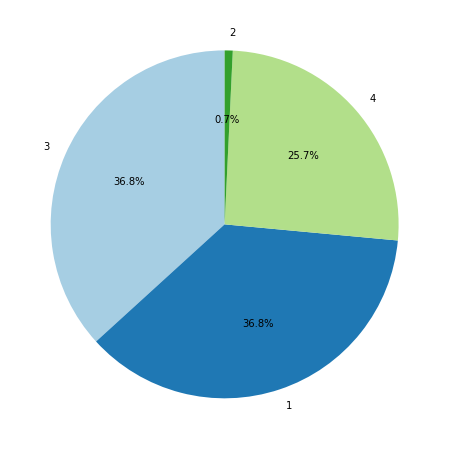

In [52]:
serie_etiquetas = pd.Series(Y)

conteo_etiquetas = serie_etiquetas.value_counts()
plt.figure(figsize = (10,8))
plt.pie(conteo_etiquetas, labels=conteo_etiquetas.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.show()

### Exploratory Data Analysis

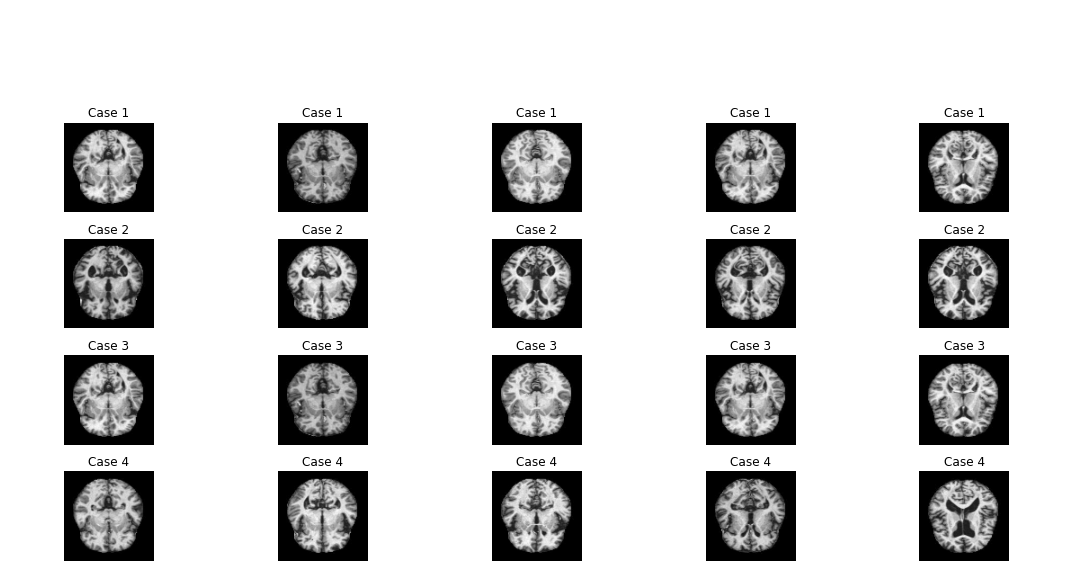

In [54]:
fig, axs = plt.subplots(5, 5, figsize=(15, 8))

for etiqueta in range(5):
    imagenes_etiqueta = [X[i] for i in range(len(Y)) if Y[i] == etiqueta]
    etiquetas_etiqueta = [Y[i] for i in range(len(Y)) if Y[i] == etiqueta]

    for i in range(min(5, len(imagenes_etiqueta))):
        row = etiqueta
        col = i

        axs[row, col].imshow(imagenes_etiqueta[i], cmap='viridis')
        axs[row, col].set_title(f'Case {etiquetas_etiqueta[i]}')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()

plt.show()

### Modeling and Evaluation

In [27]:
X = np.array(datos)
X = X.reshape(X.shape[0], -1)
Y = etiquetas

In [28]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Logistic Regression

In [30]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           1       0.27      0.30      0.29       753
           2       1.00      0.92      0.96        12
           3       0.27      0.24      0.25       800
           4       0.82      0.81      0.81       525

    accuracy                           0.41      2090
   macro avg       0.59      0.57      0.58      2090
weighted avg       0.41      0.41      0.41      2090

accuracy:  0.4105263157894737
mean_absolute_error:  1.1789473684210525
mean_squared_error:  2.4507177033492824


### Random Forest Classifier

In [31]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           1       0.16      0.18      0.17       753
           2       1.00      0.67      0.80        12
           3       0.13      0.12      0.13       800
           4       0.97      0.96      0.97       525

    accuracy                           0.36      2090
   macro avg       0.57      0.48      0.52      2090
weighted avg       0.36      0.36      0.36      2090

accuracy:  0.3555023923444976
mean_absolute_error:  1.290909090909091
mean_squared_error:  2.600956937799043


###  Decision Tree Classifier

In [32]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           1       0.17      0.22      0.19       753
           2       0.70      0.58      0.64        12
           3       0.06      0.05      0.05       800
           4       0.85      0.73      0.79       525

    accuracy                           0.29      2090
   macro avg       0.45      0.40      0.42      2090
weighted avg       0.30      0.29      0.29      2090

accuracy:  0.2851674641148325
mean_absolute_error:  1.4497607655502391
mean_squared_error:  3.0373205741626794


### KNeighborsClassifier

In [37]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           1       0.27      0.31      0.29       753
           2       0.92      1.00      0.96        12
           3       0.26      0.24      0.25       800
           4       1.00      0.92      0.96       525

    accuracy                           0.44      2090
   macro avg       0.61      0.62      0.61      2090
weighted avg       0.45      0.44      0.45      2090

accuracy:  0.43971291866028706
mean_absolute_error:  1.1172248803827751
mean_squared_error:  2.2473684210526317


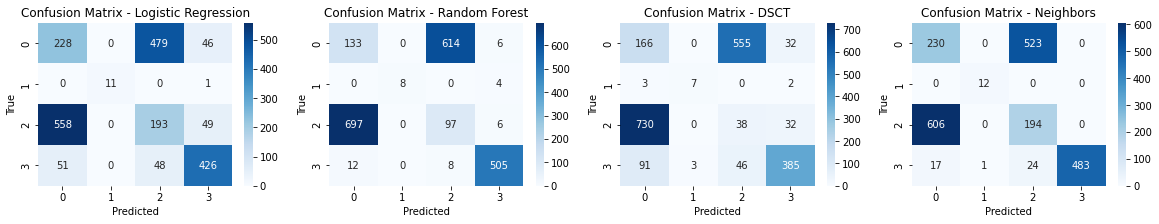

In [38]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 4, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')


sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - Neighbors')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

plt.show()

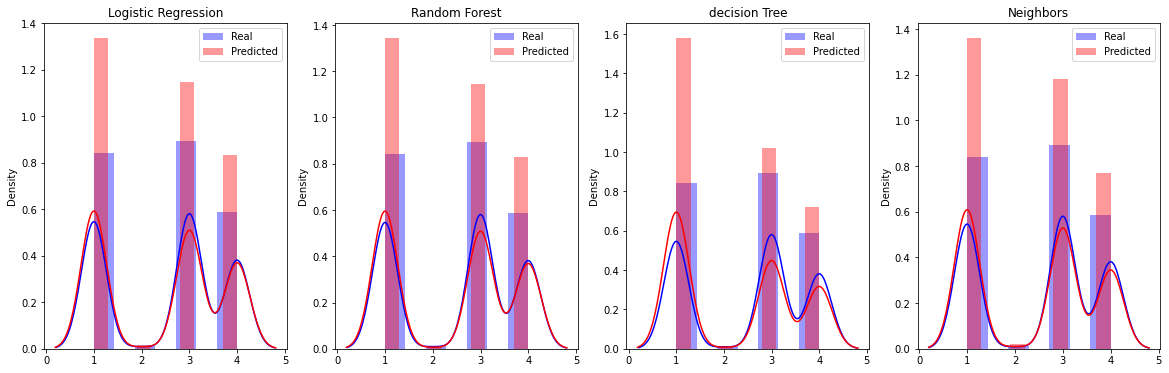

In [39]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Blue')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Blue')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Blue')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Blue')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[3], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

### RN - Keras

In [42]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   
    layers.Dense(128, activation='relu'),    
    layers.Dropout(0.2),                     
    layers.Dense(10, activation='softmax')   
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\naccuracy: {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2950 - accuracy: 0.9133 - val_loss: 0.1398 - val_accuracy: 0.9575
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1392 - accuracy: 0.9592 - val_loss: 0.0977 - val_accuracy: 0.9712
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1050 - accuracy: 0.9682 - val_loss: 0.0806 - val_accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0861 - accuracy: 0.9731 - val_loss: 0.0732 - val_accuracy: 0.9770
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9771

accuracy: 0.9771000146865845


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0650 - accuracy: 0.9797 - val_loss: 0.0763 - val_accuracy: 0.9781
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0569 - accuracy: 0.9813 - val_loss: 0.0748 - val_accuracy: 0.9770
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0507 - accuracy: 0.9831 - val_loss: 0.0715 - val_accuracy: 0.9797
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0481 - accuracy: 0.9837 - val_loss: 0.0748 - val_accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0426 - accuracy: 0.9860 - val_loss: 0.0718 - val_accuracy: 0.9787


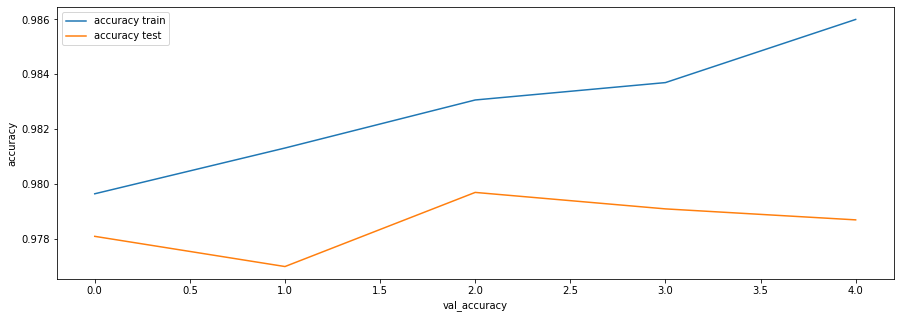

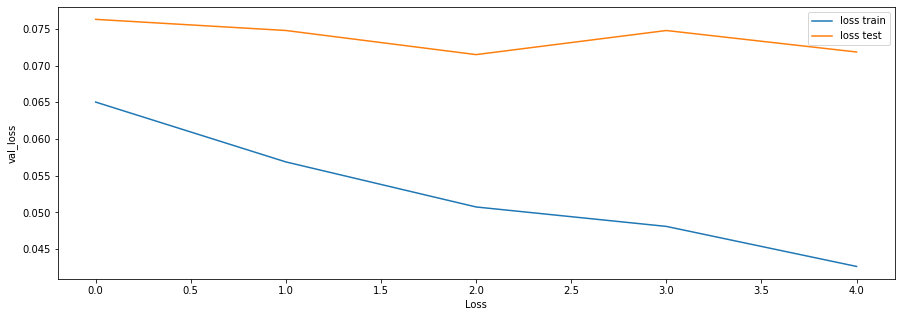

In [45]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
plt.figure(figsize = (15,5))
plt.plot(history.history['accuracy'], label='accuracy train')
plt.plot(history.history['val_accuracy'], label='accuracy test')
plt.xlabel('val_accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(history.history['loss'], label='loss train')
plt.plot(history.history['val_loss'], label='loss test')
plt.xlabel('Loss')
plt.ylabel('val_loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

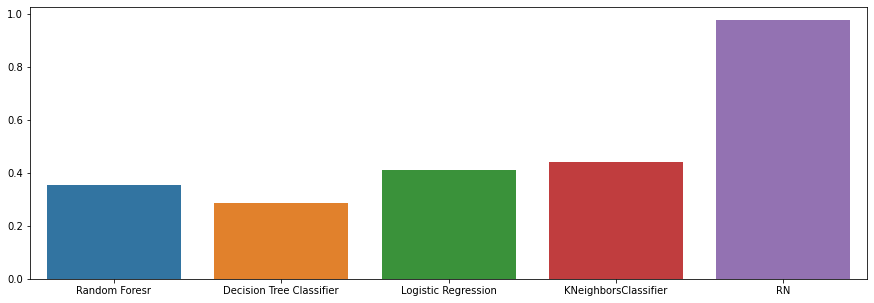

In [41]:
Acc = [accuracy_score(y_test, model_pred_R), accuracy_score(y_test, model_pred_T), 
           accuracy_score(y_test, model_pred_L), accuracy_score(y_test, model_NEG_Pred), test_acc]
names =['Random Foresr', 'Decision Tree Classifier', 'Logistic Regression','KNeighborsClassifier', 'RN']
plt.figure(figsize = (15,5))
sns.barplot(names, Acc)
plt.show()